# **Prediksi Biaya Pengobatan Pasien Berdasarkan Dataset Pribadi Biaya Medis**

#### ROW 1

import library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### ROW 2

memanggil file csv dan disimpan dalam variabel df

In [2]:
df= pd.read_csv('insurance.csv')

#### ROW 3

menampilkan 10 baris pertama pada file csv yang sudah dipanggil

In [3]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### ROW 4

menampilkan perhitungan statistik

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### ROW 5

menampilkan informasi tipe data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### ROW 6

menampilkan jumlah kolom dan baris pada file yang dibaca. baris yang digunakan dalam perhitungan adalah 1338 baris dan kolom berjumlah 7

In [6]:
print('Number of rows and columns in the data set: ',df.shape)

Number of rows and columns in the data set:  (1338, 7)


#### ROW 7

mencari data yang memiliki nilai null.

hasilnya adalah tidak ada kolom yang memiliki nilai null.

In [7]:
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### ROW 8

membuat design untuk menampilkan data dalam diagram yang diinginkan

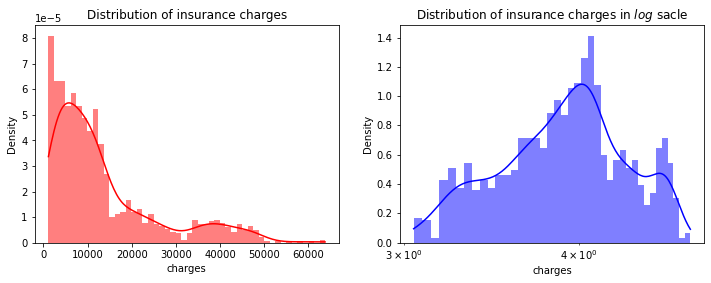

In [8]:
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.histplot(df['charges'],bins=50,color='r',ax=ax, kde=True, stat="density", linewidth=0)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.histplot(np.log10(df['charges']),bins=40,color='b',ax=ax, kde=True, stat="density", linewidth=0)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()


#### ROW 9

menampilkan data kategori menggunakan diagram batang
- sex
- smoker
- region

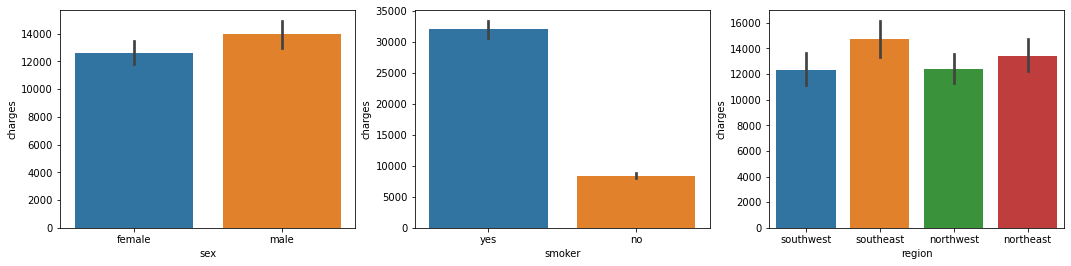

In [9]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

#### ROW 10

menampilkan data numerik menggunakan pairplot
- age
- bmi
- children
- charges

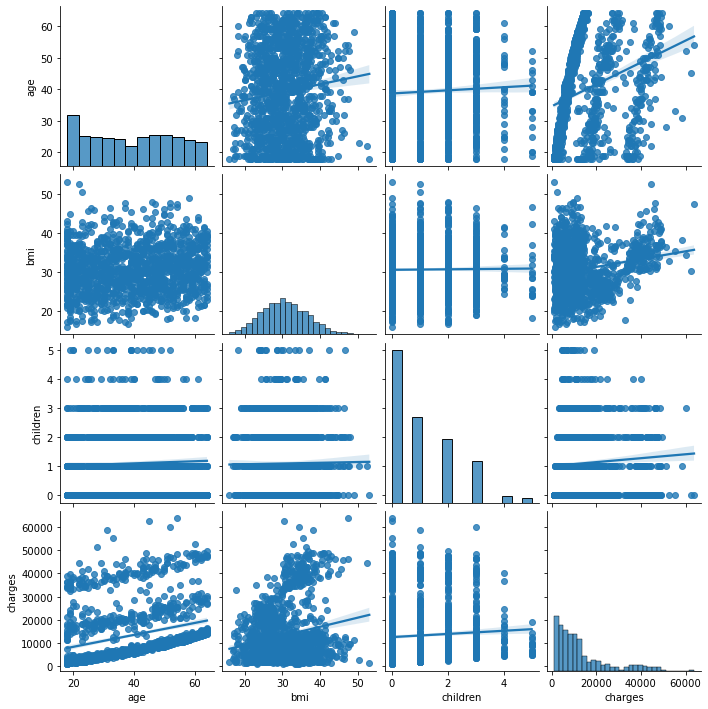

In [10]:
sns.pairplot(df,kind="reg")

#### ROW 11

menampilkkan data menggunakan diagram Heatmap

<AxesSubplot:>

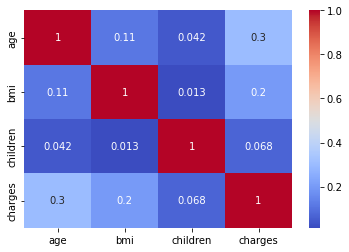

In [11]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

#### ROW 12

memberi label untuk gender male, female, perokok, dan bukan perokok

In [12]:
df['sex']=df['sex'].map({'male':1, 'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

#### ROW 13

menetapkan variabel dummy ke variabel kategoris yang tersisa. menampilkan 5 baris pertama

In [13]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


#### ROW 14

membagi data tes dan data train

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

#### ROW 15

menghitung linear regression

In [15]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7958786376014414


#### ROW 16

menghitung polinomial

In [16]:
X = df.drop(['charges','region_northwest','region_southeast','region_southwest'], axis = 1)
Y = df.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147236


#### ROW 17

menghitung explained variance score

In [17]:
from sklearn.metrics import explained_variance_score
explained_variance_score(Y_test, Y_test_pred)

0.885368444680932

#### ROW 18

menghitung max error

In [18]:
from sklearn.metrics import max_error
max_error(Y_test, Y_test_pred)

20806.106163235032